In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import idx2numpy
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from deepshape.surfaces import *

In [3]:
file = "../data/t10k-images.idx3-ubyte"
data = torch.tensor( idx2numpy.convert_from_file(file) )
labelfile = "../data/t10k-labels.idx1-ubyte"
labels = torch.tensor( idx2numpy.convert_from_file(labelfile))

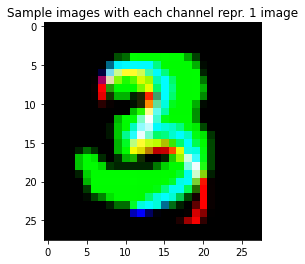

In [4]:
k=64
digit = 3
digits = data[labels==digit]

img_idx = 15
im = digits[img_idx:img_idx+3].clone().detach() / 255.
plt.imshow(im.permute(1, 2, 0))
plt.title("Sample images with each channel repr. 1 image")
plt.show()

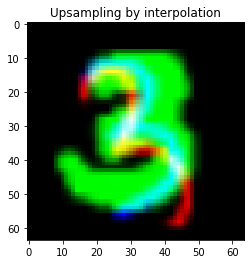

In [5]:
X = torch_square_grid(k=k)

imginterp = ImageInterpolator(im)
out = imginterp(X)
plt.figure()
plt.imshow(out)
plt.title("Upsampling by interpolation")
plt.show()

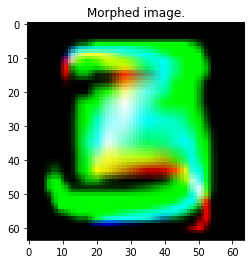

In [6]:
X = torch_square_grid(k=k)
X += np.sin(2 * np.pi * X) * 0.1

imginterp = ImageInterpolator(im)
out = imginterp(X)
plt.figure()
plt.imshow(out)
plt.title("Morphed image.")
plt.show()

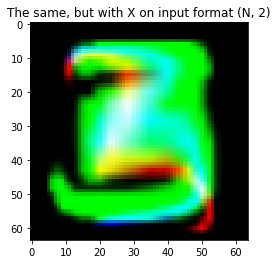

In [7]:
imginterp = ImageInterpolator(im)
out = imginterp(X.view(-1, 2))

plt.figure()
plt.imshow(out.view(k, k, 3))
plt.title("The same, but with X on input format (N, 2)")
plt.show()